In [1]:
# run this in a Jupyter (IPython) Notebook!
%matplotlib notebook
import serial
import numpy as np
from matplotlib import pyplot as plt
import time


<IPython.core.display.Javascript object>


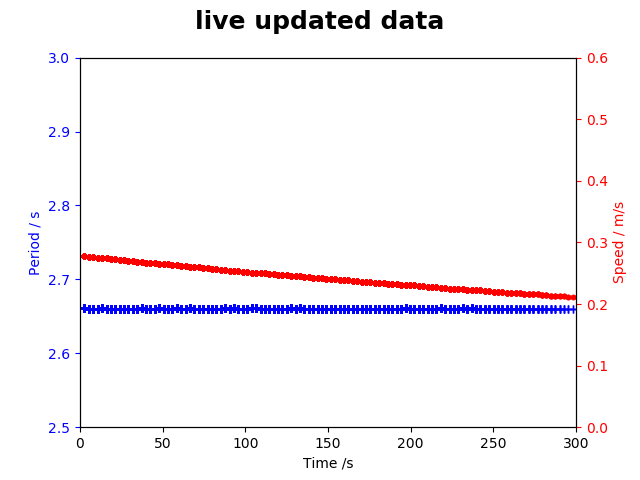

After  113 cycles, average of Period is 2.66034 +- 0.00029(s).


In [61]:
#If you're not using Linux, you'll need to change this
#check the Arduino IDE to see what serial port it's attached to
ser = serial.Serial('/dev/ttyACM0', 115200)
# For a MAC, eg.
#ser = serial.Serial('/dev/cu.usbmodem1411', 115200)

view_time = 4 # seconds of data to view at once
duration = 300 # total seconds to collect data

fig, ax1 = plt.subplots()

xdata =   []
y1data =   [] 
y2data =   [] 

fig.suptitle('live updated data', fontsize='18', fontweight='bold')
ax1.set_xlabel('Time /s')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Period / s', color='b')
ax1.tick_params('y', colors='b')

xrange = [0,duration]
y1range = [2.5,3.0]
ax1.set_xlim(xrange)
ax1.set_ylim(y1range)

ax2 = ax1.twinx()
ax2.set_ylabel('Speed / m/s', color='r')
ax2.tick_params('y', colors='r')
y2range = [0.0,0.6]  # Addapt here
ax2.set_ylim(y2range)

#fig.tight_layout()
#plt.show()

plt.ion()
fig.show()
fig.canvas.draw()

ser.reset_input_buffer()
for i in range(2):  # ignore some lines, save last one
    line= ser.readline()
data = line.split(b',')
timeStart = float(data[0]); # in milli sec

#for i in range(20):
run = True
cycles =0
#collect the data and plot a moving frame
while run:    
    ser.reset_input_buffer()
    line= ser.readline()
    data = line.split(b',')
    #print(data)
    cycles +=1
    # sometimes the incoming data is garbage, so just 'try' to do this
    try:
        xdata.append((float(data[0]) - timeStart )/1000.0 ) 
        y1data.append((float(data[1])/1.0e6)) 
        y2data.append((0.057 * 1e6/float(data[2]))) 

        ax1.plot(xdata, y1data, 'b+')
        ax2.plot(xdata, y2data, 'r.')
        # when time's up, kill the collect+plot loop
        if xdata[-1] > duration: run=False
    # if the try statement throws an error, just do nothing
    except: 
        pass
    # update the plot
   
    fig.canvas.draw()
    fig.canvas.flush_events()

ser.close()  
fname = 'data_' + time.strftime("%Y%m%d-%H%M%S") + '.txt'
save_array=np.array([xdata, y1data , y2data])
np.savetxt(fname, save_array.transpose())
print('After  {0:d} cycles, average of Period is {1:.5f} +- {2:.5f}(s).'.format(cycles, \
                            np.average(y1data), np.std(y1data)))


In [53]:
#xdata, run 

#np.average(y1data)
#np.savetxt(fname, xdata)
a=np.array([xdata, y1data , y2data])
#a=np.array([[xdata], [y1data]])
np.savetxt(fname, a.transpose())

In [24]:
dat=np.loadtxt('data_20180515-185726.txt')
time=dat[:,0]
period=dat[:,1]
#period

<IPython.core.display.Javascript object>


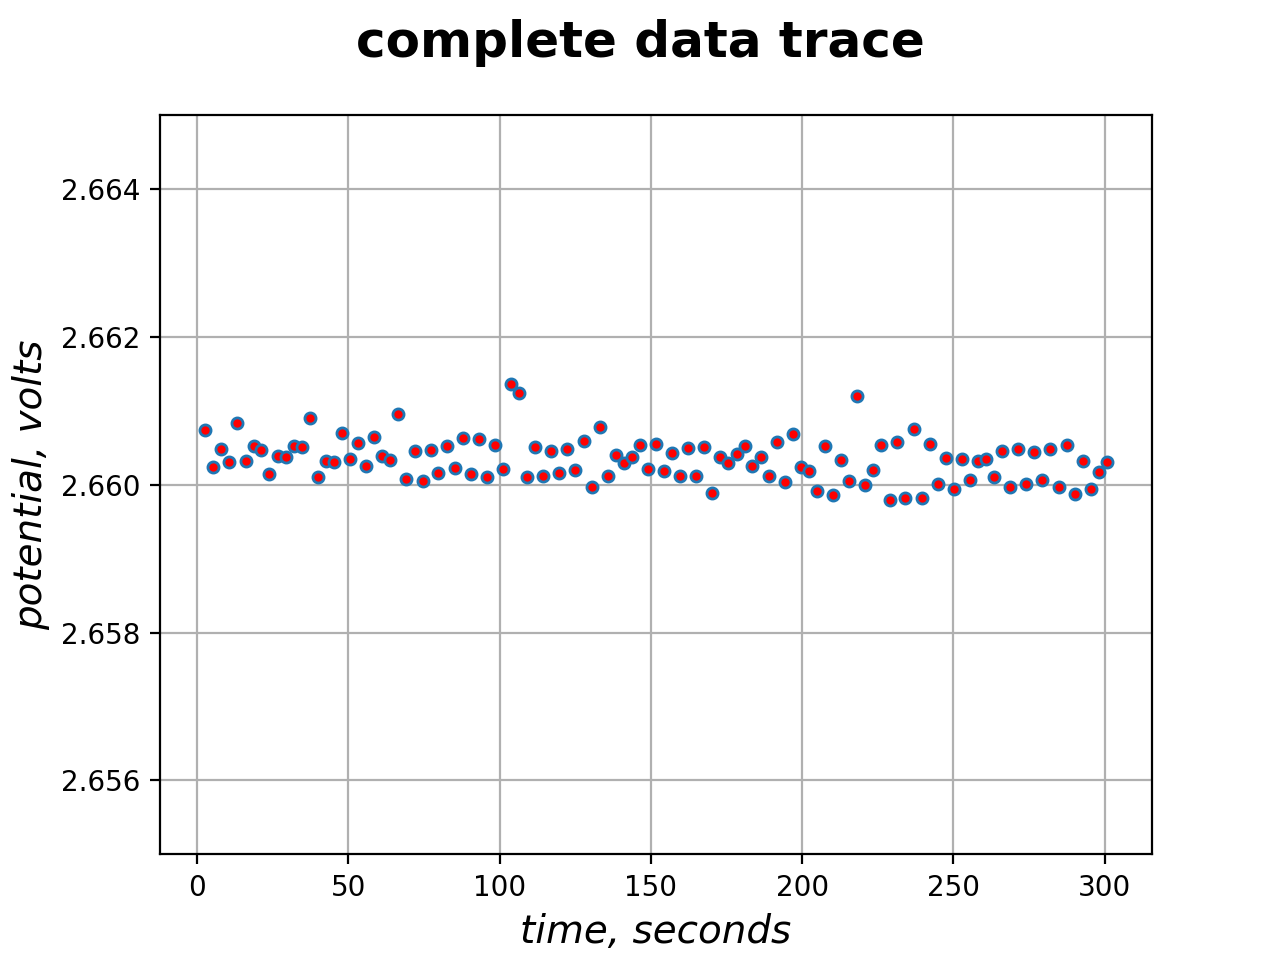

In [16]:
# plot all of the data you collected
fig2, ax1 = plt.subplots()
#fig2 = plt.figure()
# http://matplotlib.org/users/text_props.html
fig2.suptitle('complete data trace', fontsize='18', fontweight='bold')
plt.xlabel('time, seconds', fontsize='14', fontstyle='italic')
plt.ylabel('potential, volts', fontsize='14', fontstyle='italic')
#plt.axes().grid(True)
plt.plot(time,period,marker='o',markersize=4,linestyle='none',markerfacecolor='red')
yrange = [2.655,2.665]
plt.grid()
plt.ylim(yrange)
fig2.show()


<IPython.core.display.Javascript object>


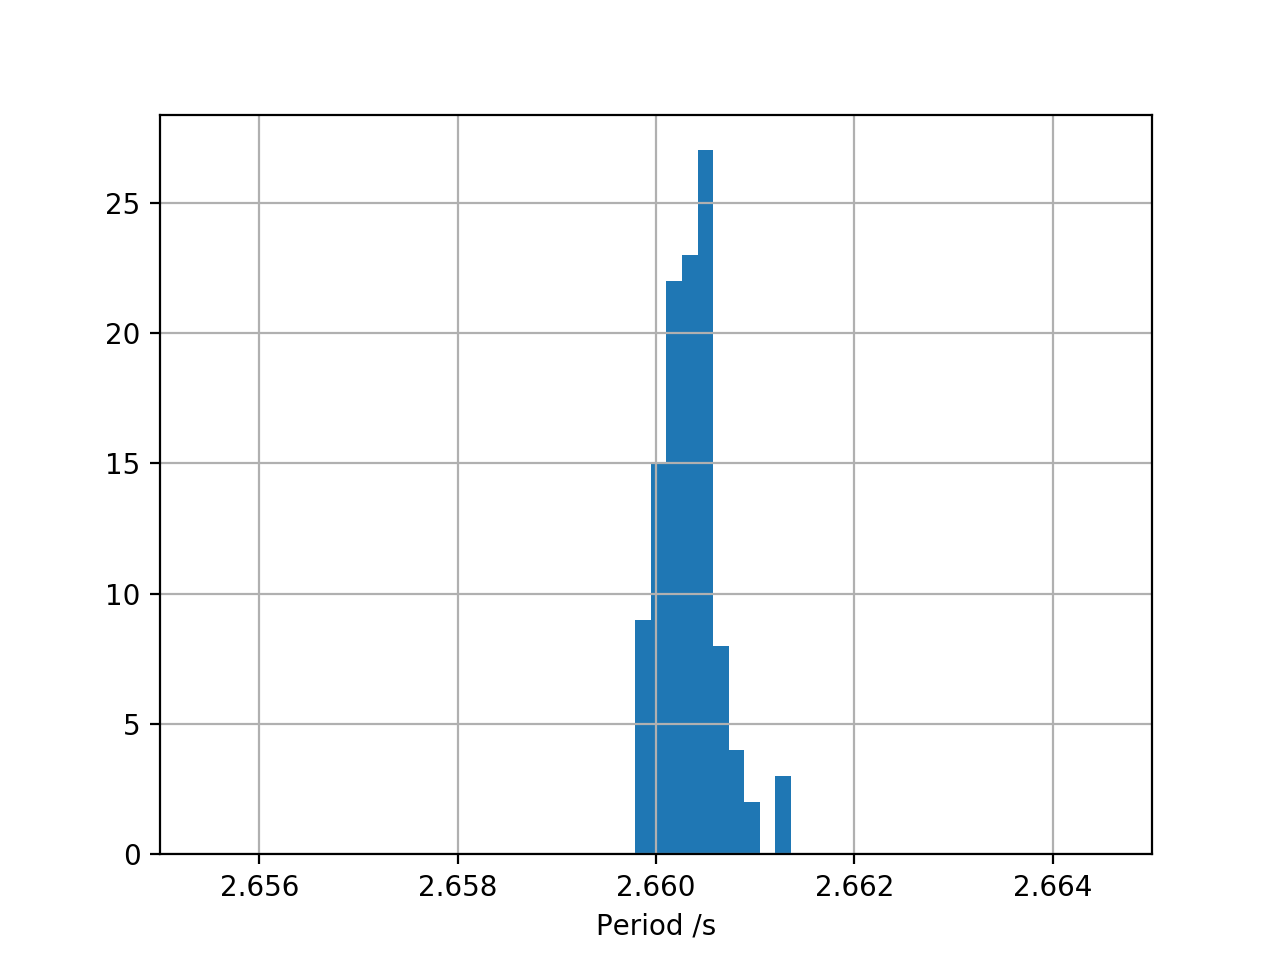

In [23]:
# the histogram of the data
#n, bins, patches = plt.hist(period, bins=50, facecolor='green', alpha=0.75)
fig3 = plt.figure()
n, bins, patches = plt.hist(period) #, bins=50, facecolor='green', alpha=0.75)


plt.grid(True)
#plt.xlim([2.655,2.665])
plt.xlim(yrange)

plt.xlabel('Period /s')
#plt.ylabel('Probability')
plt.show()